In [1]:
import fxcmpy

In [2]:
fxcmpy.__version__

'1.2.5'

In [3]:
TOKEN = '71ec67818275600cfcb24e9103f517665a313d08'

In [4]:
con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error')

1. Get 800 EUR/USD trading data from API

In [5]:
data = con.get_candles('EUR/USD', period='D1', number=800)
#data['bidclose'].plot(figsize=(10, 6));

In [6]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


2. Using bidhigh as our sample data

In [7]:
data['bidhigh'][:800].head(2)

date
2017-03-23 21:00:00    1.08043
2017-03-24 21:00:00    1.08173
Name: bidhigh, dtype: float64

In [8]:
data['bidhigh'][:800].tail(2)

date
2019-10-17 21:00:00    1.11391
2019-10-18 21:00:00    1.11345
Name: bidhigh, dtype: float64

In [9]:
y = data['bidhigh'][:800].values.reshape(800,1)
x = np.arange(800).reshape(800,1)

3. Using GPy

In [10]:
# Import the Gaussian process Python package
import GPy
Q = 1
k = GPy.kern.RBF(Q)
m = GPy.models.GPRegression(X=x, Y=y, kernel=k)

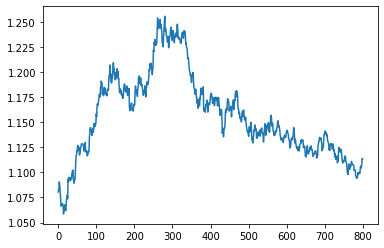

In [11]:
plot(x,y)

In [12]:
m.optimize(messages=1)

In [13]:
mu,var = m.predict(x)

In [14]:
def plot_fit(x,y,mu,var, m_y='k-o', m_mu='b-<', l_y='true', l_mu='predicted', legend=True, title=''):
    """
    Plot the fit of a GP
    """
    if y is not None:
        plt.plot(x,y, m_y, label=l_y)
    plt.plot(x,mu, m_mu, label=l_mu)
    vv = 2*np.sqrt(var)
    plt.fill_between(x[:,0], (mu-vv)[:,0], (mu+vv)[:,0], alpha=0.2, edgecolor='gray', facecolor='cyan')
    if legend:
        plt.legend()
    if title != '':
        plt.title(title)

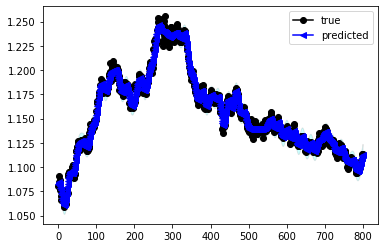

In [15]:
plot_fit(x, y, mu, var)

4. Extrapolation

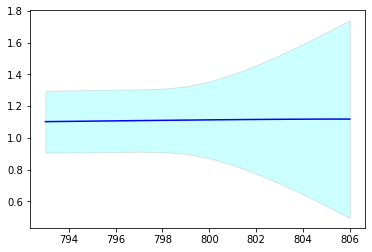

In [16]:
X_extrap = np.arange(807).reshape(807,1)
mu,var = m.predict(X_extrap)
#predict next week
#showing last week of train data and next week
plot_fit(X_extrap[-14:], None, mu[-14:],(np.sqrt(var)*2)[-14:], '', 'b-', legend=False)


Name : GP regression
Objective : -2796.8210667931503
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.49972299418482374  |      +ve      |        
  rbf.lengthscale          |      15.663969217976364  |      +ve      |        
  Gaussian_noise.variance  |  1.9503782665324934e-05  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x28357906248>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x2835d5ab948>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x2835d5c4e48>]}

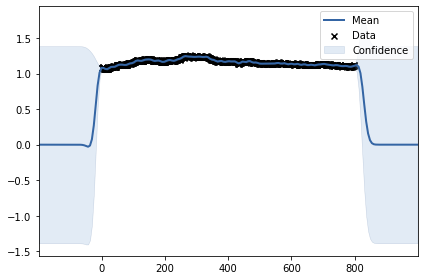

In [17]:
print(m)
m.plot()